 
# 🌀 Topological Analysis of Time Series
Embracing complexity - Mallorca 2025  | 
Julia Mindlin
julia.mindlin@uni-leipzig.de

To run this notebook you need to install python and run the following command:

$ conda create environment jupyter scipy 

Then, on the folder where you cloned the Github repository, run the following and open the jupyter notebook:

$ jupyter-notebook

## Tutorial Outline

This notebook explores the geometry, topology, and complexity of one of the simplest chaotic systems: the Rössler attractor. By using numerical simulations, time series analysis, and data-driven modeling, we aim to reveal the rich structure hidden in deterministic chaos.

The analysis consistes of three main parts:

**Part I:** Foundations with an Example System
We begin by integrating the Rössler system and studying its dynamics. We analyze the attractor in phase space, detect unstable periodic orbits, and estimate geometric properties like effective dimension. Using Takens’ embedding theorem, we reconstruct the attractor from a single time series, and we investigate topological features such as linking numbers of orbits. We also introduce symbolic tools like permutation entropy and statistical complexity to quantify the system's unpredictability.

**Part II:** Deep Dive into a Specific Metric
Once familiar with the core techniques, we propose that you zoom in on one metric of interest — such as the effective dimension or statistical complexity — and explore how it varies with parameters or preprocessing of the data. This step reinforces how the metric behaves and how it captures structural information.

**Part III:** Project-Based Analysis of a Dataset
In the final part, we apply the tools developed so far to a more complex dataset. This part encourages guided exploration, using the following questions:

- * Analyze the complexity of the data using entropy and disequilibrium metrics.

- * Can you detect unstable periodic orbits in the attractor? What are their recurrence periods?

- * Do different time series from the same dataset share recurrences of similar periods? Why might this be the case based on your prior knowledge of the underlying dynamics?

- * Estimate the effective dimension of the system.

- * Reconstruct the attractor using time-delay embedding.

- * Search for recurrences in the integrated system and evaluate their linking number.

- * (If you are really into the problem!) Use SINDy (Sparse Identification of Nonlinear Dynamics) to infer governing equations from the data, and compare simulated trajectories.

This notebook blends tools from dynamical systems and information theory to form a coherent framework for understanding and modeling chaotic dynamics. It is suited for students and researchers with a basic knowledge of differential equations, Python, and nonlinear systems.



## Part I

## Introduction: The Rössler System

The **Rössler attractor** is a system of three coupled, first-order nonlinear differential equations introduced by Otto Rössler in 1976. It is one of the simplest continuous-time systems that exhibits chaotic dynamics.

The equations are:

\[
\begin{aligned}
\dot{x} &= -y - z \\
\dot{y} &= x + a y \\
\dot{z} &= b + z(x - c)
\end{aligned}
\]

With suitable parameters (e.g., \( a = 0.2, b = 0.2, c = 5.7 \)), this system generates a **strange attractor**: a bounded, non-repeating trajectory that shows sensitivity to initial conditions — a hallmark of chaos.

### 🧬 Real-World Applications

Despite its mathematical simplicity, the Rössler attractor captures features observed in several real systems, including:

- **Chemical reactions** (e.g. the Belousov-Zhabotinsky reaction),
- **Cardiac tissue models** where electrical waves loop and spiral chaotically,
- **Ecological models** involving predator-prey dynamics with feedback,
- **Neural oscillations** in simplified brain models,
- **Electronic circuits** designed to demonstrate chaos (Chua and Rössler circuits).

---

## 1. Integrating the Rössler System

We begin by numerically integrating the Rössler equations using standard methods (e.g., Runge-Kutta). This produces a trajectory in three-dimensional phase space, typically forming a spiral-like attractor with rich geometric structure.

Our goal is to obtain a long time series \( \{x(t), y(t), z(t)\} \) that can be analyzed using topological and geometric tools. This data will serve as the foundation for all subsequent analysis.

---

## 2. Detecting Periodic Orbits Using Close Return Maps

A way to uncover structure in chaotic time series is to identify recurrences or approximations to unstable **periodic orbits** that coexist with the attractor through **close return maps**. These maps identify pairs of points \( (i, j) \) in time where the trajectory nearly returns to a previous position — a clue that the system is shadowing a **periodic orbit**.

We define a close return whenever:

\[
\begin{aligned}
|x[i] - x[i + j]| < \epsilon
\end{aligned}
\]

Visualizing these points as a 2D map often reveals horizontal lines — traces of periodic orbits embedded within the chaotic attracto
---

## 3. Estimating the Effective Dimension Using Nearest Neighbors and reconstructing the Attractor via Time Delay Embedding (Takens' Theorem) a

Using **Takens' embedding theorem**, we reconstruct the attractor from a single time series (e.g., the x-variable). We apply time-delay embedding with suitable delay τ and embedding dimension m.


To estimate the **effective dimension** (or correlation dimension) of the attractor, we use a nearest-neighbor approach on the trajectory. This helps quantify the minimal number of coordinates needed to reconstruct the system without loss of information.

r. These orbits are central to understanding the underlying topology of the attractor.

---

## 4. Studying Topological Invariants: Linking Number

The geometry of periodic orbits encodes deep topological information. By extracting pairs of periodic orbits, we can compute their **linking number** — a classical topological invariant that counts how many times one orbit loops around another.

This number is invariant under continuous deformation and helps classify the organization of orbits within the attractor. In chaotic dynamics, the appearance of non-zero linking numbers is strong evidence of topological complexity.

---

## 5. Statistical Complexity Using Bandt-Pompe and Disequilibrium

Finally, we assess the **topological complexity** of the time series. This may involve:

- Counting the number and types of periodic orbits,
- Calculating topological invariants like linking and knotting numbers,
- Estimating entropy or symbolic dynamics,
- Measuring the richness of recurrence structures.

These tools go beyond traditional statistical measures, providing a deeper, shape-based understanding of the chaotic system. The goal is to reveal how intricate or “twisted” the attractor is — a fingerprint of its underlying dynamics.

We use **Bandt-Pompe symbolic entropy** and the modified disequilibrium measure to quantify the **statistical complexity** of the time series.

---

## 6. Symbolic Regression with SINDy (Sparse Identification of Nonlinear Dynamics)

We use the **SINDy algorithm** to recover the governing equations from data using sparse regression. This allows us to reconstruct the underlying differential equations from a single variable (e.g., x).


### Definitions:

- Entropy:
\[
\begin{aligned}
H = -\sum_i p_i \log(p_i)
\end{aligned}
\]

- Disequilibrium (Martin et al., 2003):
\[
\begin{aligned}
D_M = D_0 \cos^{-1}\left(\sum_{i=1}^N \sqrt{p_i \cdot \frac{1}{N}} \right), \quad D_0 = \frac{1}{\cos^{-1}(1/\sqrt{N})}
\end{aligned}
\]

- Complexity:
\[
\begin{aligned}
C = H \cdot D_M
\end{aligned}
\]


### References

Bandt, C., & Pompe, B. (2002). Permutation Entropy: A Natural Complexity Measure for Time Series. Physical Review Letters, 88(17), 174102. https://doi.org/10.1103/PhysRevLett.88.174102

Brunton S.L., Proctor J.L. and Kutz J.N. (2016), Discovering governing equations from data by sparse identification of nonlinear dynamical systems, Proc. Natl. Acad. Sci. U.S.A. 113 (15) 3932-3937, https://doi.org/10.1073/pnas.1517384113.

Kennel, M. B., Brown, R., & Abarbanel, H. D. I. (1992). Determining embedding dimension for phase-space reconstruction using a geometrical construction. Physical Review A, 45(6), 3403–3411. https://doi.org/10.1103/PhysRevA.45.3403

López-Ruiz, R., Mancini, H. L., & Calbet, X. (1995). A statistical measure of complexity. Physics Letters A, 209(5–6), 321–326. https://doi.org/10.1016/0375-9601(95)00867-5

Martin, M. T., Plastino, A., & Rosso, O. A. (2003). Statistical complexity and disequilibrium. Physics Letters A, 311(2–3), 126–132. https://doi.org/10.1016/S0375-9601(03)00491-2 

Mindlin, G. B., Hou, X.-J., Solari, H. G., Gilmore, R., & Tufillaro, N. B. (1990). Classification of strange attractors by integers. Physical Review Letters, 64(20), 2350–2353. https://doi.org/10.1103/PhysRevLett.64.2350

Mindlin, G. M., & Gilmore, R. (1992). Topological analysis and synthesis of chaotic time series. Physica D: Nonlinear Phenomena, 58(1–4), 229–242. https://doi.org/10.1016/0167-2789(92)90111-Y

Takens, F. (1981). Detecting strange attractors in turbulence. In D. Rand & L.-S. Young (Eds.), Dynamical Systems and Turbulence, Warwick 1980 (Vol. 898, pp. 366–381). Springer Berlin Heidelberg. https://doi.org/10.1007/BFb0091924


### 1. Integrating the Rössler System

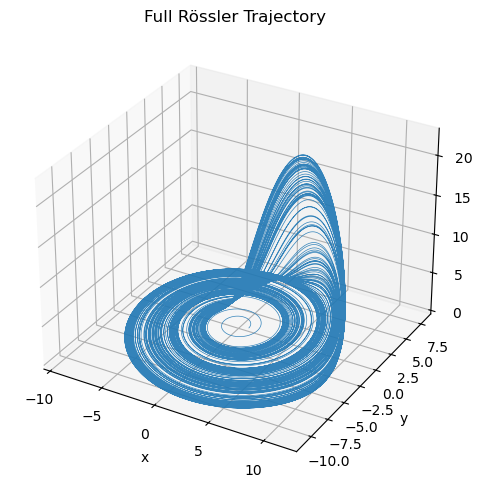

In [5]:
import numpy as np
import math

from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
plt.style.use('default')

from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist
from itertools import permutations


# Define the Rössler system
def rossler(t, state, a=0.2, b=0.2, c=5.7):
    x, y, z = state
    dx = -y - z
    dy = x + a * y
    dz = b + z * (x - c)
    return [dx, dy, dz]

# Integrate the system
def integrate_rossler(t_span, y0, dt=0.01):
    t_eval = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(rossler, t_span, y0, t_eval=t_eval, method='RK45')
    return sol.t, sol.y.T

# Main routine
t, trajectory = integrate_rossler((0, 1000), [1, 0, 0])

# Plotting setup
fig = plt.figure(figsize=(12, 5))

# Full trajectory (subplot 1)
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5, alpha=0.9)
ax1.set_title("Full Rössler Trajectory")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.tight_layout()
plt.show()


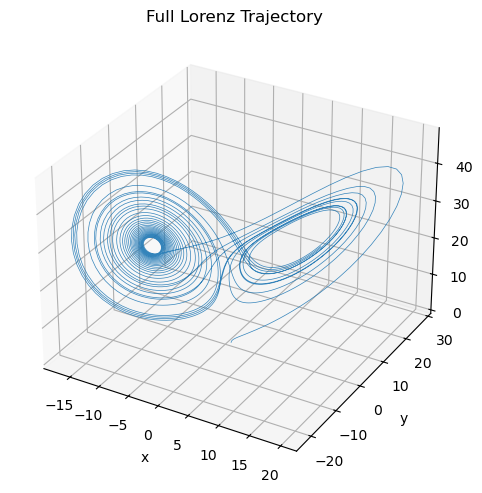

In [6]:
# Lorenz system definition
def lorenz(t, state, sigma=10.0, rho=28.0, beta=8/3):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]


# Integrate the system
def integrate_lorenz(t_span, y0, dt=0.01):
    t_eval = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(lorenz, t_span, y0, t_eval=t_eval, method='RK45')
    return sol.t, sol.y.T

# Main routine
t, trajectory_lorenz = integrate_lorenz((0, 1000), [1, 0, 0])

# Plotting setup
fig = plt.figure(figsize=(12, 5))

# Full trajectory (subplot 1)
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot(trajectory_lorenz[:3000, 0], trajectory_lorenz[:3000, 1], trajectory_lorenz[:3000, 2], lw=0.5, alpha=0.9)
ax1.set_title("Full Lorenz Trajectory")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

plt.tight_layout()
plt.show()



### 2. Detecting Periodic Orbits Using Close Return Maps

A way to uncover structure in chaotic time series is to identify recurrences or approximations to unstable **periodic orbits** that coexist with the attractor through **close return maps**. These maps identify pairs of points \( (i, j) \) in time where the trajectory nearly returns to a previous position — a clue that the system is shadowing a **periodic orbit**.

We define a close return whenever:

\[
\begin{aligned}
|x[i] - x[i + j]| < \epsilon
\end{aligned}
\]

Visualizing these points as a 2D map often reveals horizontal lines — traces of periodic orbits embedded within the chaotic attractor. These orbits are central to understanding the underlying topology of the attractor.


In [15]:
def close_returns(senal, max_shift=1000, eps_ratio=0.05):
    """Compute close return map for a 1D signal.
    
    Parameters:
    - senal: 1D numpy array
    - max_shift: number of j values to evaluate
    - eps_ratio: epsilon threshold relative to signal range
    
    Returns:
    - 2D binary array with shape (len(senal), max_shift)
    """
    cr = np.zeros((len(senal), max_shift))
    eps = (np.max(senal) - np.min(senal)) * eps_ratio
    for j in range(max_shift):
        for i in range(len(senal) - max_shift):
            if (np.abs(senal[i + j] - senal[i]) < eps and
                np.abs(senal[i + j + 1] - senal[i + 1]) < eps):
                cr[i, j] = 1
    return cr

def find_indices(matrix):
    """Return (i, j) indices of 1s in binary matrix."""
    return list(zip(*np.where(matrix == 1)))

def figure_cr(x, y, color='k'):
    """Create a figure with a scatter and histogram of close returns."""
    fig = plt.figure(figsize=(10, 10), dpi=300)

    # Define axis geometry
    rect_scatter = [0.1, 0.1, 0.65, 0.65]
    rect_histy = [0.76, 0.1, 0.15, 0.65]

    ax_scatter = plt.axes(rect_scatter)
    ax_histy = plt.axes(rect_histy)

    # Main scatter plot
    ax_scatter.scatter(x, y, s=0.8, color=color)
    ax_scatter.set_xlabel('i', fontsize=26)
    ax_scatter.set_ylabel('j', fontsize=26)

    # Set limits dynamically based on data
    ax_scatter.set_xlim(0, max(x) + 10)
    ax_scatter.set_ylim(0, max(y) + 10)

    # Histogram for the y-axis
    bins = np.arange(0, max(y) + 30, 30)
    ax_histy.hist(y, bins=bins, orientation='horizontal', color=color)
    ax_histy.set_ylim(ax_scatter.get_ylim())
    ax_histy.set_xlim(1, np.max(np.histogram(y, bins=bins)[0]) * 1.1)

    # Style
    ax_scatter.tick_params(labelsize=16)
    ax_histy.tick_params(labelsize=16, labelleft=False)
    ax_scatter.xaxis.set_ticks_position('bottom')
    ax_scatter.yaxis.set_ticks_position('left')

    return fig

def close_returns_for_plot(senal, max_shift=1000, eps_ratio=0.05):
    """Wrapper to get x, y arrays for close returns."""
    cr = close_returns(senal, max_shift, eps_ratio)
    indices = find_indices(cr)
    return [i for i, _ in indices], [j for _, j in indices]


# x, y = close_returns_for_plot(trajectory[:10000, 0], max_shift=3000, eps_ratio=0.005)
# fig = figure_cr(x, y,color='k')
# fig.show()


In [14]:
# x, y = close_returns_for_plot(trajectory_lorenz[3000:10000,0], max_shift=600, eps_ratio=0.005)
# fig = figure_cr(x, y,color='k')
# fig.show()

### 3. False Nearest Neighbors and Embedding Analysis

#### A. Embedding Construction

Given a time series $ x(t) $, we construct a time-delay embedding of dimension $ w $ and delay $ \tau $ using:

\[
\begin{aligned}
\mathbf{y}_k = [x_k, x_{k+\tau+1}, x_{k+2(\tau+1)}, \ldots, x_{k+(w-1)(\tau+1)}]
\end{aligned}
\]

where $ k = 0, \ldots, N - (w - 1)(\tau + 1) $. The embedding matrix $ \mathbf{Y} \in \mathbb{R}^{N' \times w} $ is then defined by stacking each $ \mathbf{y}_k $ as rows.

#### B. Nearest Neighbor Search ('NNsearch' function)

Given embedded data $ \mathbf{Y} = [\mathbf{y}_1, \ldots, \mathbf{y}_N] $, the goal is to compute the nearest neighbor of each point:

1. For each $ i $, compute the squared Euclidean distance:

\[
\begin{aligned}
D_{ij} = \|\mathbf{y}_i - \mathbf{y}_j\|^2 \quad \text{for } j > i
\end{aligned}
\]

2. Construct a symmetric distance matrix $ D \in \mathbb{R}^{N \times N} $ with:

- $ D_{ii} = 100 $ (large constant to avoid self-matching),
- $ D_{ij} = D_{ji} $ for $ i \neq j $.

3. Find nearest neighbor index:

\[
\begin{aligned}
\text{idx}_i = \arg\min_{j} D_{ij}
\end{aligned}
\]

4. The minimum Euclidean distance is:

\[
\begin{aligned}
d_i = \sqrt{D_{i, \text{idx}_i}}
\end{aligned}
\]

#### C. False Nearest Neighbors ('NNpercent' function)

The percentage of false nearest neighbors is evaluated as a function of embedding dimension $ w $. For each $ w = 1, 2, \ldots, 5 $:

1. For each point ($ \mathbf{y}_k $), and its nearest neighbor ($ \mathbf{y}_{\text{idx}_k} $), compute the normalized growth in the added dimension:

\[
\begin{aligned}
R_k = \frac{|x_{k + wT} - x_{\text{idx}_k + wT}|}{d_k}
\end{aligned}
\]

2. A point is considered to have a **false nearest neighbor** if:

\[
\begin{aligned}
R_k \geq 10
\end{aligned}
\]

3. The **percentage of false neighbors** is:

\[
\begin{aligned}
\text{FNN}_w = \frac{\#\{k : R_k \geq 10\}}{N - T}
\end{aligned}
\]

4. The process is repeated for dimensions \( w = 1 \) through \( 5 \), and the percentage of false neighbors for each is returned as a list:

\[
\begin{aligned}
[\text{FNN}_1, \text{FNN}_2, \ldots, \text{FNN}_5]
\end{aligned}
\]

#### Summary

This approach helps determine the **minimum embedding dimension** required to unfold the dynamics of a time series by evaluating when the proportion of false nearest neighbors significantly decreases.


In [4]:
import numpy as np

def NNsearch(y, dim):
    # y contains the embedding points: [[P1], [P2], [P3],..., [PN]]
    # dim = the embedding dimension
    N = len(y)  # Number of points
    y = np.array(y)  # Convert to NumPy array
    Dij = []  # Initialize the matrix of squared distances between points i and j

    for k in range(len(y) - 1):
        # Create a matrix of size (N-k-1, dim) where the row is the point y[k]
        My = np.full((N - k - 1, dim), y[k])
        if dim == 1:
            # For 1D, distance is simply (Pk - Pj)^2
            Dktodos = np.power((My.transpose() - y[k + 1:])[0], 2, dtype=float)
        else:
            # For dim > 1, compute Euclidean squared distance
            Dktodos = np.sum(np.power(My - y[k + 1:], 2, dtype=float), axis=1, dtype=float)

        # The distance matrix row has zeros up to index k, then the distances we just calculated
        fila = list(np.concatenate((np.zeros(k + 1), Dktodos)))
        Dij.append(fila)

    # Last point doesn't need distances calculated; add a row of zeros
    Dij.append(list(np.zeros(N)))
    Dij = np.array(Dij)

    # Make the matrix symmetric and add large value to diagonal to avoid self-matching
    Dij = Dij + Dij.transpose() + np.eye(N) * 100

    # Find indices of the minimum value in each row (nearest neighbor)
    indice_min = np.argmin(Dij, axis=1)

    # Compute the actual (Euclidean) distance to the nearest neighbor
    dist_min = []
    for k in range(N):
        dist_min.append(np.sqrt(Dij[k][indice_min[k]]))

    return indice_min, dist_min


def NNpercent(x):
    false_neighbor_percentages = []
    dim = 1
    T = 50  # Time delay step

    # Dimension 1
    indice_min, dist_min = NNsearch(x, dim)
    growth_ratios = []
    false_neighbors = 0
    unprocessed_points = 0

    for k in range(len(indice_min) - T):
        if indice_min[k] + dim * T < len(x):
            R_aux = np.abs(x[k + dim * T] - x[indice_min[k] + dim * T]) / dist_min[k]
            growth_ratios.append(R_aux)
            if R_aux >= 10:
                false_neighbors += 1
        else:
            unprocessed_points += 1

    false_neighbor_percentages.append(false_neighbors / (len(x) - T))

    # Dimension 2
    y_emb_2 = [[x[k], x[k + T]] for k in range(len(x) - T)]
    dim = 2
    indice_min, dist_min = NNsearch(y_emb_2, dim)

    growth_ratios = []
    false_neighbors = 0
    unprocessed_points = 0

    for k in range(len(indice_min) - T):
        if indice_min[k] + dim * T < len(x):
            R_aux = np.abs(x[k + dim * T] - x[indice_min[k] + dim * T]) / dist_min[k]
            growth_ratios.append(R_aux)
            if R_aux >= 10:
                false_neighbors += 1
        else:
            unprocessed_points += 1

    print("False neighbor percentage (dim=2):", false_neighbors / (len(x) - T))
    print("Unprocessed points:", unprocessed_points)
    false_neighbor_percentages.append(false_neighbors / (len(x) - T))

    # Dimension 3
    y_emb_3 = [[x[k], x[k + T], x[k + 2 * T]] for k in range(len(x) - 2 * T)]
    dim = 3
    indice_min, dist_min = NNsearch(y_emb_3, dim)

    growth_ratios = []
    false_neighbors = 0
    unprocessed_points = 0

    for k in range(len(indice_min) - T):
        if indice_min[k] + dim * T < len(x):
            R_aux = np.abs(x[k + dim * T] - x[indice_min[k] + dim * T]) / dist_min[k]
            growth_ratios.append(R_aux)
            if R_aux >= 10:
                false_neighbors += 1
        else:
            unprocessed_points += 1

    print("False neighbor percentage (dim=3):", false_neighbors / (len(x) - T))
    print("Unprocessed points:", unprocessed_points)
    false_neighbor_percentages.append(false_neighbors / (len(x) - T))

    # Dimension 4
    y_emb_4 = [[x[k], x[k + T], x[k + 2 * T], x[k + 3 * T]] for k in range(len(x) - 3 * T)]
    dim = 4
    indice_min, dist_min = NNsearch(y_emb_4, dim)

    growth_ratios = []
    false_neighbors = 0
    unprocessed_points = 0

    for k in range(len(indice_min) - T):
        if indice_min[k] + dim * T < len(x):
            R_aux = np.abs(x[k + dim * T] - x[indice_min[k] + dim * T]) / dist_min[k]
            growth_ratios.append(R_aux)
            if R_aux >= 10:
                false_neighbors += 1
        else:
            unprocessed_points += 1

    false_neighbor_percentages.append(false_neighbors / (len(x) - T))

    # Dimension 5
    y_emb_5 = [[x[k], x[k + T], x[k + 2 * T], x[k + 3 * T], x[k + 4 * T]] for k in range(len(x) - 4 * T)]
    dim = 5
    indice_min, dist_min = NNsearch(y_emb_5, dim)

    growth_ratios = []
    false_neighbors = 0
    unprocessed_points = 0

    for k in range(len(indice_min) - T):
        if indice_min[k] + dim * T < len(x):
            R_aux = np.abs(x[k + dim * T] - x[indice_min[k] + dim * T]) / dist_min[k]
            growth_ratios.append(R_aux)
            if R_aux >= 10:
                false_neighbors += 1
        else:
            unprocessed_points += 1

    false_neighbor_percentages.append(false_neighbors / (len(x) - T))

    return false_neighbor_percentages


def embedding(tau, dato, w):
    """
    Generalized time-delay embedding function.

    Parameters:
    - tau: time delay
    - dato: 1D numpy array (time series signal)
    - w: embedding dimension

    Returns:
    - 2D numpy array of shape (N, w), where each row is a delay vector
    """
    if len(dato.shape) != 1:
        raise ValueError("Input 'dato' must be a 1D array.")

    max_index = dato.shape[0] - (w - 1) * (tau + 1)
    if max_index <= 0:
        raise ValueError("Embedding dimension and delay are too large for the data length.")

    indices = (np.arange(w) * (tau + 1)) + np.arange(max_index).reshape(-1, 1)
    embedding = dato[indices]

    return embedding  # shape (N, w)


In [6]:
def NNsearch(y, dim):
    #y contiene los puntos del embedding [[P1], [P2], [P3],...,[PN]]
    #dim = la dimension del embedding
    #Definimos el numero de puntos
    N = len(y)
    #Transformamos el vector y en un array
    y = np.array(y)
    #Inicializamos la matriz de distancia cuadrática entre puntos i j
    Dij = []
    #Calculamos las distancias
    for k in range(len(y)-1):
        #Armamos una matriz de "N-k-1" filas y "dim" columnas en las que se
        #repite el punto Pk al que le vamos a calcular la distancia con el resto
        My = np.full((N-k-1, dim), y[k])
        if dim ==1:
            #Si la dimension es 1, la distancia es restar (Pk - Pj)^2
            Dktodos = np.power((My.transpose() - y[k+1:])[0], 2, dtype=float)
        else:
            #Si la dimension es >1, la distancia es ((xk-xj)^2+(yk-yj)^2+...)
            #por eso hacemos la resta de componentes, elevamos al cuadrado
            #y despues sumamos
            Dktodos = np.sum(np.power(My-y[k+1:],2, dtype=float), 1, dtype=float)
        #La fila de la matriz va a ser ceros hasta el lugar k y despues empiezan
        #las distancias que calculamos
        fila = list(np.concatenate((np.zeros(k+1), Dktodos)))
        Dij.append(fila)
        #print("Porcentaje :", 100*k/N)
    #Al ultimo punto no hace falta calcularle las distancias. Agregamos una fila
    #de ceros
    Dij.append(list(np.zeros(N)))
    Dij = np.array(Dij)
    #Hasta aca tenemos una matriz triangular superior, con ceros en la diagonal
    #La matriz debe ser simetrica. Y para que al buscar la minima distancia
    #no nos agarre el punto consigmo mismo; le sumamos algo grande a la diagonal    
    Dij = Dij + Dij.transpose() + np.eye(N) *100
    #Ya teniendo la matriz de distancias cuadraticas, buscamos los indices
    #en los que esta el minimo de cada fila
    indice_min = np.argmin(Dij, 1)
    #Teniendo los indices, guardamos la minima distancia
    dist_min = []
    for k in range(N):
        dist_min.append(np.sqrt(Dij[k][indice_min[k]]))
    #Por utlimo, devolvemos los indices de minimo y el valor de la distancia
    return indice_min, dist_min


def NNpercent(x):
    porcentaje_falsos_vecinos = []
    dim = 1

    T = 50
    indice_min, dist_min = NNsearch(x, dim)
    #Determino cuales son falsos vecinos para 1d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1

    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))
    
    y_emb_2 = []

    for k in range(len(x)-1*T):
        y_emb_2.append([x[k], x[k+T]])

    dim = 2
    indice_min, dist_min = NNsearch(y_emb_2, dim)

    #Determino cuales son falsos vecinos para 2d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1
    print("Percentaje of false NN is:", falsos_vecinos / (len(x)-T))
    print(puntos_noanalizados)
    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))

    y_emb_3 = []

    for k in range(len(x)-2*T):
        y_emb_3.append([x[k], x[k+T], x[k+2*T]])

    dim = 3
    indice_min, dist_min = NNsearch(y_emb_3, dim)
    #Determino cuales son falsos vecinos para 3d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1
    print("Percentaje of false NN is:", falsos_vecinos / (len(x)-T))
    print(puntos_noanalizados)
    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))


    y_emb_4 = []

    for k in range(len(x)-3*T):
        y_emb_4.append([x[k], x[k+T], x[k+2*T], x[k+3*T]])

    dim = 4
    indice_min, dist_min = NNsearch(y_emb_4, dim)

    #Determino cuales son falsos vecinos para 4d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1
            
    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))

    y_emb_5 = []

    for k in range(len(x)-4*T):
        y_emb_5.append([x[k], x[k+T], x[k+2*T], x[k+3*T], x[k+4*T]])

    dim = 5
    indice_min, dist_min = NNsearch(y_emb_5, dim)
    #Determino cuales son falsos vecinos para 4d
    R_crecimiento = []
    falsos_vecinos = 0
    puntos_noanalizados = 0
    for k in range(len(indice_min)-T):
        if indice_min[k]+dim*T < len(x):
            R_aux = np.abs( x[k+dim*T] - x[indice_min[k]+dim*T] ) / dist_min[k]
            R_crecimiento.append(R_aux)
            if R_aux >= 10:
                falsos_vecinos+=1
        else:
            puntos_noanalizados+=1

    porcentaje_falsos_vecinos.append(falsos_vecinos / (len(x)-T))
    return porcentaje_falsos_vecinos


def embedding(tau, dato, w):
    """
    Generalized embedding function.

    Parameters:
    - tau: time delay
    - dato: 1D numpy array (signal)
    - w: embedding dimension

    Returns:
    - embedding: 2D numpy array of shape (N, w)
    """
    if len(dato.shape) != 1:
        raise ValueError("Input 'dato' must be a 1D array.")

    max_index = dato.shape[0] - (w - 1) * (tau + 1)
    if max_index <= 0:
        raise ValueError("Embedding dimension and tau too large for data length.")

    indices = (np.arange(w) * (tau + 1)) + np.arange(max_index).reshape(-1, 1)
    embedding = dato[indices]

    return embedding  # shape (N, w)

    

In [19]:
NNrossler = NNpercent(trajectory[:10000,0])

In [18]:
# Plot
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(np.arange(1,6,1),NNrossler, color='black')
plt.scatter(np.arange(1,6,1),NNrossler, color='black')
# Aesthetics

ax.set_xlabel('Embedding Dimension', fontsize=12, color='black')
ax.set_ylabel('False Nearest Neighbors (%)', fontsize=12, color='black')
ax.set_title('False Nearest Neighbors vs. Embedding Dimension', color='black', fontsize=14)
ax.tick_params(colors='black')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
NNlorenz = NNpercent(trajectory_lorenz[:10000,0])

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(np.arange(1,6,1),NNlorenz, color='black')
plt.scatter(np.arange(1,6,1),NNlorenz, color='black')
# Aesthetics

ax.set_xlabel('Embedding Dimension', fontsize=12, color='black')
ax.set_ylabel('False Nearest Neighbors (%)', fontsize=12, color='black')
ax.set_title('False Nearest Neighbors vs. Embedding Dimension', color='black', fontsize=14)
ax.tick_params(colors='black')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
    
def find_repeated_fragments(time_series, tolerancia=0.05, lag=25):
    fragmentos_repetidos = []
    series_length = len(time_series)
    
    for i in range(series_length - lag):
        fragmento = time_series[i:i + lag + 1]
        for j in range(i + lag + 1, series_length - lag):
            candidato = time_series[j:j + lag + 1]
            if len(fragmento) == len(candidato) and all(abs(fragmento[k] - candidato[k]) <= tolerancia for k in range(len(fragmento))):
                fragmentos_repetidos.append((i, j))
    
    return fragmentos_repetidos


orbits = find_repeated_fragments(trajectory[:7000, 0])

orbits_no_rep = []
orbit0 = orbits[0]
orbits_no_rep.append(orbit0)
for orbit in orbits:
    if ((np.abs(orbit[0] - orbit0[0]) > 200) and (np.abs(orbit[1] - orbit0[1]) > 200)):
        orbits_no_rep.append(orbit)
        orbita0 = orbit

# Plotting setup
fig = plt.figure(figsize=(12, 5))

# Full trajectory (subplot 1)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5,color='k')
ax1.set_title("Full Rössler Trajectory")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# Periodic orbits (subplot 2)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

colors = {'period-2': 'r', 'period-3': 'b'}
labels_plotted = {'period-2': False, 'period-3': False}

for orbit in orbits_no_rep:
    start, end = orbit
    length = end - start

    if 1100 <= length <= 1300 and not labels_plotted['period-2']:
        ax2.plot(trajectory[start:end, 0], trajectory[start:end, 1], trajectory[start:end, 2],
                 color=colors['period-2'], lw=2, label='Period-2 Orbit')
        labels_plotted['period-2'] = True

    elif 1700 <= length <= 1900 and not labels_plotted['period-3']:
        ax2.plot(trajectory[start:end, 0], trajectory[start:end, 1], trajectory[start:end, 2],
                 color=colors['period-3'], lw=2, label='Period-3 Orbit')
        labels_plotted['period-3'] = True

    # Stop if both orbits are found
    if all(labels_plotted.values()):
        break

ax2.set_title("Extracted Periodic Orbits")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.legend()

plt.tight_layout()
plt.show()


### 3: Topological Validation Using the Linking Number (LN)

To validate a dynamical model, we can compare **topological invariants**—such as the **linking number (LN)**—between the model’s orbits and those extracted from data.

#### What is the Linking Number?

The linking number quantifies how many times **two distinct closed orbits** wind around each other in 3D space. It is a fundamental invariant in knot theory and serves as a measure of **topological entanglement** between paired trajectories. It’s calculated from a 2D projection of the pair by:

1. **Identifying crossing points** between the two curves in the projection.
2. **Determining crossing direction**:
   - At each crossing between Curve A and Curve B, draw tangents.
   - Determine which curve passes over the other (typically using orientation or a derivative like `x'`).
   - Assign a **sign** \( $\sigma$ $\pm$ 1 \) depending on the handedness:
     - Clockwise rotation → \( $\sigma$ = -1 \)
     - Counter-clockwise rotation → \( $\sigma$ = +1 \)
3. **Summing over all crossings** and dividing by 2 to compute the LN:

\[
$\text{LN}(A, B)$ = $\frac{1}{2}$ $\sum_i$ $\sigma_i$
\]

#### Implementation Details

- The orientation (e.g., via the derivative `x' = y`) helps determine which strand is “over” or “under”.
- Crossings where the curves are nearly tangent (i.e., \( |\Delta x'| < 0.005 \)) are excluded to avoid numerical artifacts.
- This method is applied pairwise to all orbits extracted using the **close returns** method.

### Model Validation

When comparing pairs of orbits from simulation and data, **matching linking numbers** suggest that the model accurately captures the **global topological structure** of the system. It verifies that not only the shape of individual orbits but also their **mutual winding patterns** are faithfully reproduced.


In [10]:

# G. Uribarri, and G. B. Mindlin, "The structure of reconstructed flows in latent spaces", Chaos 30, 093109 (2020)


# @article{doi:10.1063/5.0013714,
# author = {Uribarri,Gonzalo  and Mindlin,Gabriel B. },
# title = {The structure of reconstructed flows in latent spaces},
# journal = {Chaos: An Interdisciplinary Journal of Nonlinear Science},
# volume = {30},
# number = {9},
# pages = {093109},
# year = {2020},
# doi = {10.1063/5.0013714},
# URL = { 
#         
# },
# eprint = { 
#         https://doi.org/10.1063/5.0013714  
# }
# }


from scipy import interpolate
import numpy as np

def _rect_inter_inner(x1,x2):
    n1=x1.shape[0]-1
    n2=x2.shape[0]-1
    X1=np.c_[x1[:-1],x1[1:]]
    X2=np.c_[x2[:-1],x2[1:]]
    S1=np.tile(X1.min(axis=1),(n2,1)).T
    S2=np.tile(X2.max(axis=1),(n1,1))
    S3=np.tile(X1.max(axis=1),(n2,1)).T
    S4=np.tile(X2.min(axis=1),(n1,1))
    return S1,S2,S3,S4

def _rectangle_intersection_(x1,y1,x2,y2):
    S1,S2,S3,S4=_rect_inter_inner(x1,x2)
    S5,S6,S7,S8=_rect_inter_inner(y1,y2)

    C1=np.less_equal(S1,S2)
    C2=np.greater_equal(S3,S4)
    C3=np.less_equal(S5,S6)
    C4=np.greater_equal(S7,S8)

    ii,jj=np.nonzero(C1 & C2 & C3 & C4)
    return ii,jj

def intersection(x1,y1,x2,y2):
    """
    INTERSECTIONS Intersections of curves.
    Computes the (x,y) locations where two curves intersect.  The curves
    can be broken with NaNs or have vertical segments.

    This part of the code was taken from: https://github.com/sukhbinder/intersection
    """
    ii,jj=_rectangle_intersection_(x1,y1,x2,y2)
    n=len(ii)

    dxy1=np.diff(np.c_[x1,y1],axis=0)
    dxy2=np.diff(np.c_[x2,y2],axis=0)

    T=np.zeros((4,n))
    AA=np.zeros((4,4,n))
    AA[0:2,2,:]=-1
    AA[2:4,3,:]=-1
    AA[0::2,0,:]=dxy1[ii,:].T
    AA[1::2,1,:]=dxy2[jj,:].T

    BB=np.zeros((4,n))
    BB[0,:]=-x1[ii].ravel()
    BB[1,:]=-x2[jj].ravel()
    BB[2,:]=-y1[ii].ravel()
    BB[3,:]=-y2[jj].ravel()

    for i in range(n):
        try:
            T[:,i]=np.linalg.solve(AA[:,:,i],BB[:,i])
        except:
            T[:,i]=np.NaN


    in_range= (T[0,:] >=0) & (T[1,:] >=0) & (T[0,:] <=1) & (T[1,:] <=1)

    xy0=T[2:,in_range]
    xy0=xy0.T
    return xy0[:,0],xy0[:,1]

def _closer_point_index(curve,point):
    dist_vec = np.subtract(curve,point)
    normas = np.asarray([np.linalg.norm(vec) for vec in dist_vec])
    ind = np.argmin(normas)
    return ind

def _mad(a, axis=None):
    """
    Compute *Median Absolute Deviation* of an array along given axis.
    """

    # Median along given axis, but *keeping* the reduced axis so that
    # result can still broadcast against a.
    med = np.median(a, axis=axis, keepdims=True)
    mad = np.median(np.abs(a - med), axis=axis)  # MAD along given axis

    return mad


def linking_number(curve_1,curve_2, projection = 'AUTO',puntos_curva=5000, margin=10, verbose=False):
    """
    Computes the *Linking Number* between two three dimensional curves.

    Inputs
    curve_1: array_like
        array of shape (3, N1) with N1 the number of points of curve 1
    curve_2: array_like
        array of shape (3, N2) with N2 the number of points of curve 2
    projection: {'XY','ZX','YZ','AUTO'}, optional
        Projection plane where the intersections will be computed (default 'AUTO')
    puntos_curva: int, optional
        Number of interpolation for B-spline method (default 5000)
    margin:  int, optional
        Distance taken from intersection to compute the vector (default 10)
    verbose: boolean, optional
        Print information about the computation (default False)

    Outputs
    total: float
        Linking Number (it should always be an integer, if not, check changin parameters)
    coords_1: 
        Coordinates of intesection points in the fist dimension of the projection plane (XY','ZX' or'YZ').
    coords_2: 
        Coordinates of intesection points in the second dimension of the projection plane (XY','ZX' or'YZ').

    """

    # We look for the coordinates where the curves are less 'collapsed'
    # For this we calculate the 'mad' (Median Absolute Deviation) in each dimension
    # We project on the dimensions with the highest value of mad
    if projection == 'AUTO':
        mad_x = _mad(curve_1[0]) + _mad(curve_2[0])
        mad_y = _mad(curve_1[1]) + _mad(curve_2[1])
        mad_z = _mad(curve_1[2]) + _mad(curve_2[2])
        if mad_z <= mad_x and mad_z <= mad_y:
            curve_1_projected = curve_1
            curve_2_projected = curve_2
            if verbose == True:
                print('Auto-Projection: XY')
        else:
            if mad_y <= mad_x and mad_y <= mad_x:
                curve_1_projected = [curve_1[2],curve_1[0],curve_1[1]]
                curve_2_projected = [curve_2[2],curve_2[0],curve_2[1]]
                if verbose == True:
                    print('Auto-Projection: ZX')

            else:
                if mad_x <= mad_y and mad_x <= mad_z:
                    curve_1_projected = [curve_1[1],curve_1[2],curve_1[0]]
                    curve_2_projected = [curve_2[1],curve_2[2],curve_2[0]]
                    if verbose == True:
                        print('Auto-Projection: YZ')

    if projection == 'XY':
        if verbose == True:
                    print('Projection: XY')
        curve_1_projected = curve_1
        curve_2_projected = curve_2

    if projection == 'ZX':
        if verbose == True:
                    print('Projection: ZX')
        curve_1_projected = [curve_1[2],curve_1[0],curve_1[1]]
        curve_2_projected = [curve_2[2],curve_2[0],curve_2[1]]

    if projection == 'YZ':
        if verbose == True:
                    print('Projection: YZ')
        curve_1_projected = [curve_1[1],curve_1[2],curve_1[0]]
        curve_2_projected = [curve_2[1],curve_2[2],curve_2[0]]
        
    # Puntos Curva:
    # Value that determines the resolution with which we are going to resample the curves
    # (the higher the resolution, the better the result of '_closer_point_index')
   
    # We define the vector with which we will interpolate the curves
    pasos_curva = np.divide(1,puntos_curva)
    unew = np.arange(0, 1+np.divide(pasos_curva,2), pasos_curva)

    # Interpolation of both curves
    tck, u = interpolate.splprep(curve_1_projected, s=0,k=1)
    [c1_dim1, c1_dim2,c1_dim3] = interpolate.splev(unew, tck)
    tck, u = interpolate.splprep(curve_2_projected, s=0,k=1)
    [c2_dim1, c2_dim2,c2_dim3] = interpolate.splev(unew, tck)

    # We compute the intersection between both curves
    coords_1,coords_2=intersection(c1_dim1,c1_dim2,c2_dim1,c2_dim2)

    sign = []
    arriba = []
    total = 0

    # We iterate over each intersection found
    for num in range(len(coords_1)):

        point = np.asarray([coords_1[num],coords_2[num]])

        if verbose == True:
            print('\nDim1:',point[0])
            print('Dim2:',point[1])
            
        curve_1 = np.array(list(zip(c1_dim1,c1_dim2)))
        curve_2 = np.array(list(zip(c2_dim1,c2_dim2)))

        inter_index_1 = _closer_point_index(curve_1,point)
        inter_index_2 = _closer_point_index(curve_2,point)

        
        # If the intersection is near the end of the curve
        # the sum of 'margin' can exceed the length of it
        if inter_index_1 + margin >= len(curve_1):
            final_1 = curve_1[inter_index_1+margin-len(curve_1)]
        else:
            final_1 = curve_1[inter_index_1+margin]
        if inter_index_2 + margin >= len(curve_2):
            final_2 = curve_2[inter_index_2+margin-len(curve_2)]
        else:
            final_2 = curve_2[inter_index_2+margin]

        # In the case of the beginning of the curve it resolves itself
        # (a negative index checks the vector backwards)
        inicio_1 = curve_1[inter_index_1-margin]
        inicio_2 = curve_2[inter_index_2-margin]

        # We define a vector that indicates the direction and direction of the flow at the point of intersection
        # (We do it by subtracting a point from an instant before a point from a later instant)
        flecha_1 = np.subtract(final_1,inicio_1)
        flecha_2 = np.subtract(final_2,inicio_2)

        #print('Altura_1 : ',c1_dim3[inter_index_1])
        #print('Altura_2 : ',c2_dim3[inter_index_2])

        # We check which curve passes overhead at the intersection (In the coordinate that we do NOT use in the projection)
        # We compute the vector product to know if it goes clockwise or counter-clockwise
        if c1_dim3[inter_index_1] > c2_dim3[inter_index_2]:
            if verbose == True:
                print('Upper curve: Curve 1')
            arriba.append(0)
            prod_vec = np.cross(flecha_1,flecha_2)

        else:
            if verbose == True:
                print('Upper curve: Curve 2')
            arriba.append(1)
            prod_vec = np.cross(flecha_2,flecha_1)
            
        if verbose == True:
            print('Vector Product:',prod_vec)

        # We add to the total according to the result
        if prod_vec > 0 :
            sign.append(1)
            total = total + 0.5
        else:
            sign.append(-1)
            total = total - 0.5

    if verbose == True:
        print('\nLinking number: ', total)

    return total,coords_1,coords_2

In [20]:
# Extract orbits from trajectory
orbit_period_2 = None
orbit_period_3 = None

for orbita in orbits_no_rep:
    start, end = orbita
    length = end - start

    if 1100 <= length <= 1300 and orbit_period_2 is None:
        orbit_period_2 = trajectory[start:end].T  # Shape (3, N)
    elif 1700 <= length <= 1900 and orbit_period_3 is None:
        orbit_period_3 = trajectory[start:end].T  # Shape (3, N)
    
    if orbit_period_2 is not None and orbit_period_3 is not None:
        break

# Compute linking number between the two selected orbits
ln_value, coords_x, coords_y = linking_number(orbit_period_2, orbit_period_3, projection='AUTO', verbose=True)

print(f"Linking number between period-2 and period-3 orbits: {ln_value}")


In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- Rössler system
def rossler(t, state, a=0.2, b=0.2, c=5.7):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

# --- Generate trajectory
def generate_rossler_trajectory(tmax=1000, dt=0.05, initial_state=[1.0, 1.0, 1.0]):
    t_span = (0, tmax)
    t_eval = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(rossler, t_span, initial_state, t_eval=t_eval, rtol=1e-10)
    return sol.t, sol.y.T

# --- Find recurrences
def find_recurring_segments(trajectory, threshold=0.05, min_period=100):
    N = len(trajectory)
    recurrences = []
    for i in range(N - min_period):
        for j in range(i + min_period, N):
            dist = np.linalg.norm(trajectory[i] - trajectory[j])
            if dist < threshold:
                recurrences.append((i, j))
                break
    return recurrences

# --- Extract orbit segments
def extract_periodic_orbits(trajectory, recurrences, margin=5):
    orbits = []
    for (start, end) in recurrences:
        orbit = trajectory[start-margin:end+margin]
        if len(orbit) > 20:  # skip tiny orbits
            orbits.append(orbit.T)  # shape (3, N)
    return orbits

# --- Load your linking number function
# (Make sure this block is already in the environment or loaded as a module)
# from your_module import linking_number

# --- Now use the full pipeline
t, traj = generate_rossler_trajectory(tmax=1000)
recurrences = find_recurring_segments(traj, threshold=0.05, min_period=200)
orbits = extract_periodic_orbits(traj, recurrences)

# --- Select two orbits for testing
if len(orbits) >= 2:
    curve1 = orbits[0]
    curve2 = orbits[1]

    # --- Compute linking number using your function
    lk_num, x_int, y_int = linking_number(curve1, curve2, projection='AUTO', puntos_curva=5000, margin=10, verbose=True)

    print("\n🔗 Linking Number between orbit 1 and orbit 2:", lk_num)
else:
    print("❌ Not enough orbits found to compute linking number.")


### 6. Complexity 

In [12]:
#Funcion para evaluar la permutacion a la que corresponde una ventana
def evaluate_order(values):
    # Ordeno la lista
    sorted_values = sorted(values)
    # Mapeo los valores ordenados con su indice
    order_dict = {value: index + 1 for index, value in enumerate(sorted_values)}
    # Genero lista con permutacion 
    order = [order_dict[value] for value in values]
    return order

def entropia_y_complejidad(serie_tiempo,n):
    #Defino largo de la ventana
    #n = 4
    #Permutaciones posibles 
    permutaciones_posibles = list(permutations(np.arange(1,n+1,1)))
    #Selecciono ventanas de largo n en la serie de tiempo
    ventanas = [serie_tiempo[i:i+n] for i in range(len(serie_tiempo) - n + 1)]
    #Evaluo la permutacion de cada ventana
    permutaciones = [evaluate_order(ventana) for ventana in ventanas]

    #Evaluo las probabilidades de cada permutacion posible y la guardo en un vector p_i
    probabilidades = np.zeros(len(permutaciones_posibles))
    for i,lista_a_contar in enumerate(permutaciones_posibles):
        # Inicializar el contador para la permutacion i
        contador = 0
        # Recorrer la lista de permutaciones de las ventanitas
        for sublista in permutaciones:
            if tuple(sublista) == lista_a_contar: 
                contador += 1      #Suma al contador cada vez que una ventanita corresponde a la permutacion i
        
        probabilidades[i] = contador/len(permutaciones) #Calcula la probabilidad de la permutacion i


    #Evaluo H normalizada, desequilibrio y complejidad
    p = np.array(probabilidades)
    p_sin_ceros = p[p!=0]
    H = -sum(p_sin_ceros*np.log2(p_sin_ceros))/np.log2(math.factorial(n))
    c = H*(sum(p-(1/len(p))**2))
    return H, c

def entropia_y_complejidad_wootters(serie_tiempo,n):
    #Defino largo de la ventana
    #n = 4
    #Permutaciones posibles 
    permutaciones_posibles = list(permutations(np.arange(1,n+1,1)))
    #Selecciono ventanas de largo n en la serie de tiempo
    ventanas = [serie_tiempo[i:i+n] for i in range(len(serie_tiempo) - n + 1)]
    #Evaluo la permutacion de cada ventana
    permutaciones = [evaluate_order(ventana) for ventana in ventanas]

    #Evaluo las probabilidades de cada permutacion posible y la guardo en un vector p_i
    probabilidades = np.zeros(len(permutaciones_posibles))
    for i,lista_a_contar in enumerate(permutaciones_posibles):
        # Inicializar el contador para la permutacion i
        contador = 0
        # Recorrer la lista de permutaciones de las ventanitas
        for sublista in permutaciones:
            if tuple(sublista) == lista_a_contar: 
                contador += 1      #Suma al contador cada vez que una ventanita corresponde a la permutacion i
        
        probabilidades[i] = contador/len(permutaciones) #Calcula la probabilidad de la permutacion i

    #Evaluo H normalizada, desequilibrio y complejidad
    p = np.array(probabilidades)
    p_sin_ceros = p[p!=0]
    H = -sum(p_sin_ceros*np.log2(p_sin_ceros))/np.log2(math.factorial(n))
    qw = (1/np.arccos((1/math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/math.factorial(n))**(1/2)))
    c = H*qw
    return H, qw, c


In [13]:

def moving_average(arr):
    result = [(arr[i-1] + arr[i] + arr[i+1]) / 3 if i > 0 and i < len(arr)-1 else arr[i] for i in range(len(arr))]
    return result

def non_overlapping_average(arr, window_size=3):
    result = [(sum(arr[i:i+window_size]) / window_size) if i + window_size <= len(arr) else sum(arr[i:]) / len(arr[i:]) for i in range(0, len(arr), window_size)]
    return result


c = []
h = []
j=0
n = 5
while j < 120:
    probabilidades = np.zeros(120)
    probabilidades[j] = 1
    probabilidades_it = probabilidades
    for k in range(4000):
        probabilidades_it = moving_average(probabilidades_it)
        p = np.array(probabilidades_it)
        p_sin_ceros = p[p!=0]
        H = -sum(p_sin_ceros*np.log2(p_sin_ceros))/np.log2(math.factorial(n))
        qw = (1/np.arccos((1/math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/math.factorial(n))**(1/2)))
        c.append(H*qw)
        h.append(H)
    
    j = j+1
    
    

/var/folders/50/49j6_slj4k9bq1x354fp5jwh0000gn/T/ipykernel_71664/1658942416.py:23: RuntimeWarning: invalid value encountered in arccos
  qw = (1/np.arccos((1/math.factorial(n))**(1/2)))*np.arccos(sum(p**(1/2)*(1/math.factorial(n))**(1/2)))


In [14]:
H, D, C=  entropia_y_complejidad_wootters(trajectory[:10000:30,0]/max(trajectory[:10000,0]),n=5)
H_lorenz, D_lorenz, C_lorenz=  entropia_y_complejidad_wootters(trajectory_lorenz[:10000:5,0]/max(trajectory_lorenz[:100000,0]),n=5)

In [22]:
fig = plt.figure(figsize=(8,4),dpi=300)
plt.scatter(h[:],c[:],color='k',s=0.4)
plt.scatter(H,C,color='b',label='Rössler')
plt.scatter(H_lorenz,C_lorenz,color='r',label='Lorenz')
plt.xlim(0,1)
plt.ylabel('C')
plt.xlabel('H')
plt.xlabel('H')
plt.ylabel('C')
plt.legend()
plt.show()


### 5. SINDy

In [17]:
# import pysindy as ps
### pydsindy needs to be installed from source (https://github.com/dynamicslab/pysindy?search=1)

# Use embedded data or raw trajectory
# model = ps.SINDy()
# model.fit(trajectory, t=0.01)
# model.print()


## Part II

Suggested activities:
(1) Explore the suggested dataset for recurrences. Guiding questions: 
* Based on your knowledge of the system, do you expect to observe recurrences? If so, of which period?
* Which is a reasonable amount of data to find recurrences? 
* If you find orbits of period 2 or more, compute the self-linking number of the recurrences. 

(2) Explore the statistical complexity of the suggested data. Guiding questions:
* Based on your knowledge of the system, which is a reasonable time window for the quantification of permutation entropy?
* Explore the complexity of variables in the dataset which include different experiments or conditions. Can you find any differences? 

In [1]:
### Data manipulation
import numpy as np
import pandas as pd

### Plotting
import matplotlib.pyplot as plt
from matplotlib import cm

### Processing data
from scipy.interpolate import interp1d
import scipy
from scipy.signal import filtfilt
from scipy.interpolate import CubicSpline
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations

In [2]:
# Replace 'your_file.pkl' with your actual file path
df = pd.read_pickle('./database.pkl')

In [23]:
list(df.keys())

### Open climate data

In [24]:
for i in range(2): 
    # Example time series
    x = np.arange(0,len(df['TestCLIM_S5']['data'][i,:]),1)
    y = df['TestCLIM_S5']['data'][i,:]

    # Create interpolation function (cubic)
    f_interp = interp1d(x, y, kind='cubic')

    # Create new x values: 30 points between each original point
    points_per_interval = 30
    x_interp = np.linspace(x[0], x[-1], num=(len(x) - 1) * (points_per_interval + 1) + 1)
    y_interp = f_interp(x_interp)

    x, y = close_returns_for_plot(y_interp, max_shift=2000, eps_ratio=0.005)
    fig = figure_cr(x, y)
    fig.show()


In [25]:
NNpercent = NNpercent(y_interp)

In [26]:
# Plot
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(np.arange(1,6,1),NNpercent, color='black')
plt.scatter(np.arange(1,6,1),NNpercent, color='black')
# Aesthetics

ax.set_xlabel('Embedding Dimension', fontsize=12, color='black')
ax.set_ylabel('False Nearest Neighbors (%)', fontsize=12, color='black')
ax.set_title('False Nearest Neighbors vs. Embedding Dimension', color='black', fontsize=14)
ax.tick_params(colors='black')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [27]:
df_data = embedding(10,y_interp,3).T

# Plot Lorenz attractor
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_data[0,:],df_data[1,:],df_data[2,:], color='green',lw=0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.title('Climate data', color='black')
plt.tight_layout()
plt.show()

In [25]:
orbits = find_repeated_fragments(y_interp[:10000])

orbits_no_rep = []
orbit0 = orbits[0]
orbits_no_rep.append(orbit0)
for orbit in orbits:
    if ((np.abs(orbit[0] - orbit0[0]) > 200) and (np.abs(orbit[1] - orbit0[1]) > 200)):
        orbits_no_rep.append(orbit)
        orbita0 = orbit


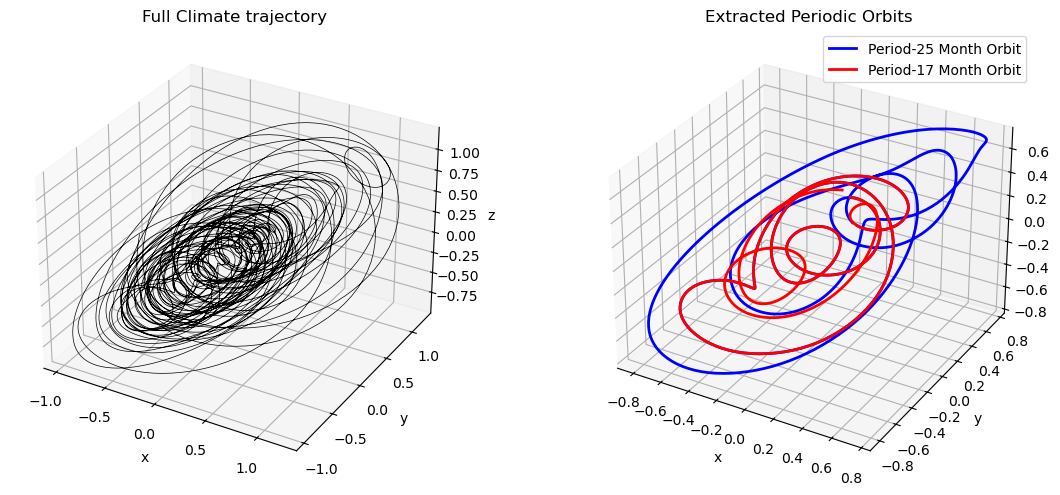

In [26]:

# Plotting setup
fig = plt.figure(figsize=(12, 5))

# Full trajectory (subplot 1)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(df_data[0,:],df_data[1,:],df_data[2,:], lw=0.5, color='k')
ax1.set_title("Full Climate trajectory")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# Periodic orbits (subplot 2)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

colors = {'period-2': 'r', 'period-3': 'b'}
labels_plotted = {'period-2': False, 'period-3': False}

for orbit in orbits_no_rep:
    start, end = orbit
    length = end - start

    if 300 <= length <= 700 and not labels_plotted['period-2']:
        ax2.plot(df_data[0,start:end],df_data[1,start:end],df_data[2,start:end],
                 color=colors['period-2'], lw=2, label='Period-'+str(int(length/30))+' Month Orbit')
        labels_plotted['period-2'] = True

    elif 700 <= length <= 1100 and not labels_plotted['period-3']:
        ax2.plot(df_data[0,start:end],df_data[1,start:end],df_data[2,start:end],
                 color=colors['period-3'], lw=2, label='Period-'+str(int(length/30))+' Month Orbit')
        labels_plotted['period-3'] = True

    # Stop if both orbits are found
    if all(labels_plotted.values()):
        break

ax2.set_title("Extracted Periodic Orbits")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.legend()

plt.tight_layout()
plt.show()


In [27]:
H_clim = []; D_clim = []; C_clim = []

for i in range(2):
    # Example time series
    x = np.arange(0,len(df['TestCLIM_S5']['data'][i,:]),1)
    y = df['TestCLIM_S5']['data'][i,:]

    # Create interpolation function (cubic)
    f_interp = interp1d(x, y, kind='cubic')

    # Create new x values: 30 points between each original point
    points_per_interval = 30
    x_interp = np.linspace(x[0], x[-1], num=(len(x) - 1) * (points_per_interval + 1) + 1)
    y_interp = f_interp(x_interp)
    H_temp, D_temp, C_temp =  entropia_y_complejidad_wootters(y_interp[:10000:30]/max(y_interp[:100000]),n=5)
    H_clim.append(H_temp); D_clim.append(D_temp); C_clim.append(C_temp)


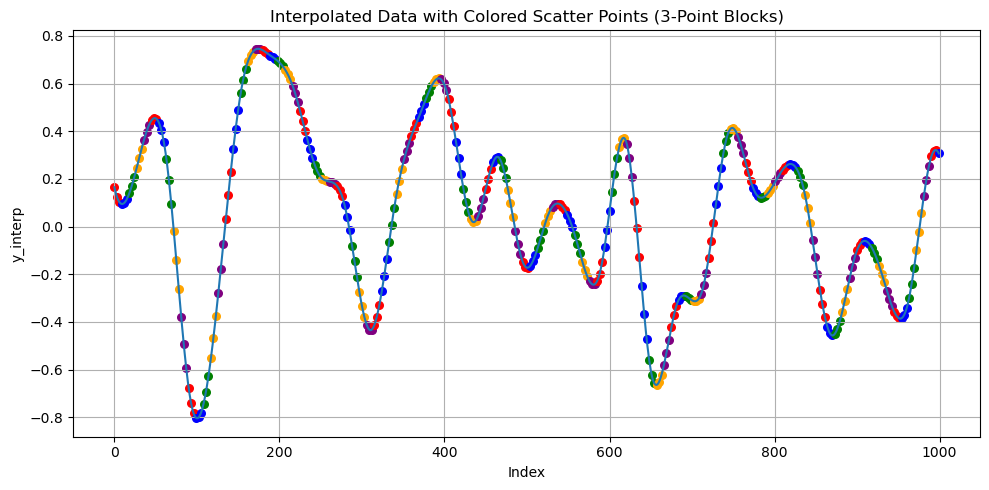

In [28]:
x = np.arange(len(y_interp[:1000]))

# Plot the full line
plt.figure(figsize=(10, 5))
plt.plot(x, y_interp[:1000], label='Interpolated Data')

# Define scatter x and y values every 30 points
x_scatter = x[::3]
y_scatter = y_interp[:1000:3]

# Colors to alternate between
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot scatter points in chunks of 3
for i in range(0, len(x_scatter), 3):
    color = colors[(i // 3) % len(colors)]
    plt.scatter(x_scatter[i:i+3], y_scatter[i:i+3], color=color, s=30)

# Labels and formatting
plt.xlabel('Index')
plt.ylabel('y_interp')
plt.title('Interpolated Data with Colored Scatter Points (3-Point Blocks)')
plt.grid(True)
plt.tight_layout()
plt.show()



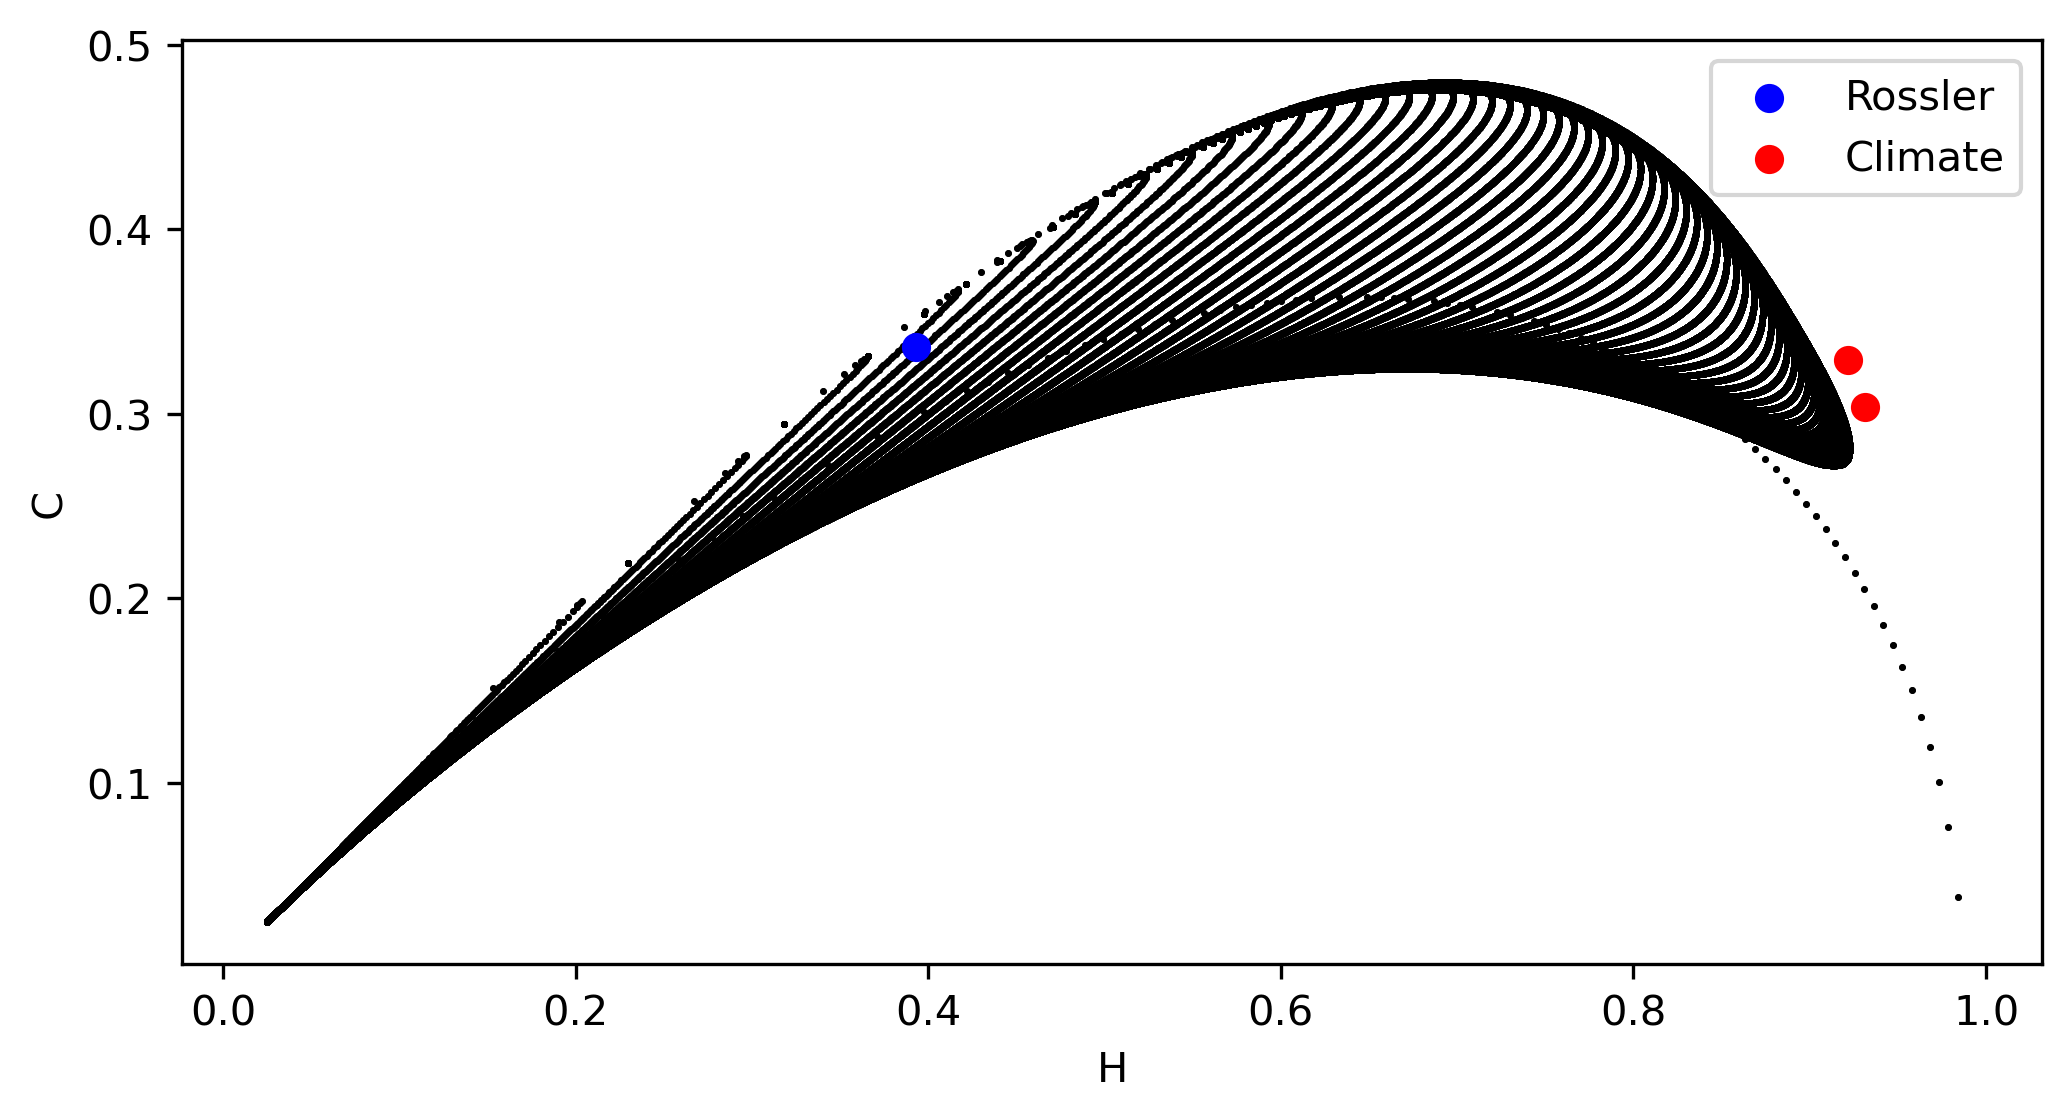

In [30]:
fig = plt.figure(figsize=(8,4),dpi=300)
plt.scatter(h[:],c[:],color='k',s=0.4)
plt.scatter(H,C,color='b',label='Rossler')
plt.scatter(H_clim,C_clim,color='r',label='Climate')
plt.ylabel('C')
plt.xlabel('H')
plt.xlabel('H')
plt.ylabel('C')
plt.legend()
plt.show()

## Part III Analysis of climate data 

Proposed activity:

1. Detect unstable period orbits in the attractor? What is the period of the recurrences? Extract recurrences from the data. Compute self-linking number and try to compute the linking number between orbits of different periods if you find them. 
2. Do different climate time series present recurrences of the same period? 
4. Find the effective dimension of the system using one of the time series. 
5. Reconstruct the phase space of the data using time-delay embedding.
6. Use SINDy to find a dynamical system from the data. Integrate the system. 
7. Search for recurrences in the integrated system. Evaluate the linking numbers of the unstable periodic orbits found in the experimental data and the recurrences in the low dimensional model.  

AT THE END SAVE pip freeze > requirements.txt

###